In [23]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

## Display Image Directly
- We will use the ipython image function to load   and display the image.



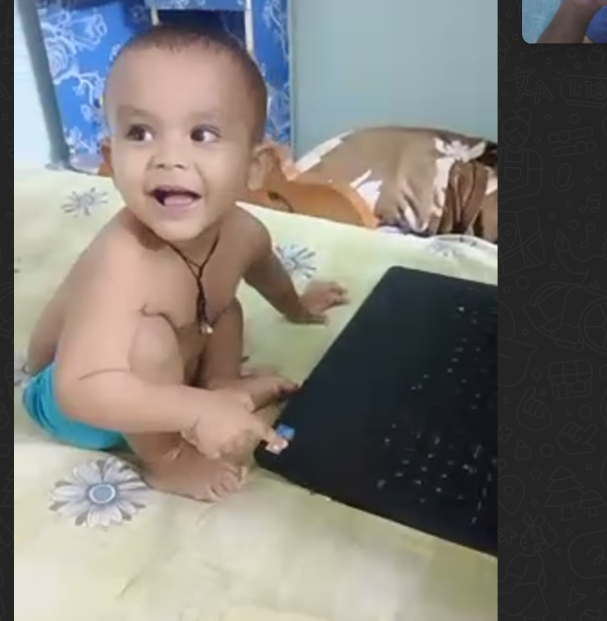

In [24]:
Image(filename = "coder.png")

# Reading images using OpenCV

- OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:
### <font color="green">Function Syntax </font>

``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.

2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


### <font color="green">OpenCV Documentation</font>

1. **`Imread`**:  <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56" target="_blank">Documentation link</a>

2. **`ImreadModes`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80" target="_blank">Documentation link</a>

In [25]:
img = cv.imread("coder.png", 0)
print(img)

[[36 38 42 ... 89 87 85]
 [37 41 43 ... 89 85 84]
 [39 43 39 ... 85 85 84]
 ...
 [43 40 36 ... 36 36 36]
 [43 39 36 ... 36 36 36]
 [43 39 36 ... 36 36 36]]


In [26]:
print("size of img, that is pixel of original imag es", img.shape)
print("Type of data in matrix:", img.dtype)  # unsigned 8 bit integer

size of img, that is pixel of original imag es (621, 607)
Type of data in matrix: uint8


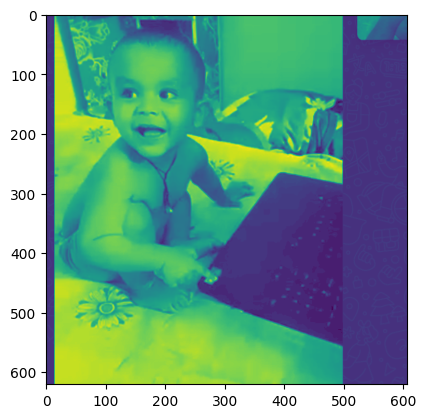

In [27]:
# Using matplotlib to display
plt.imshow(img) # not original color

### What happened?

Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()`. matplotlib uses different color maps and it's possible that the gray scale color map is not set.

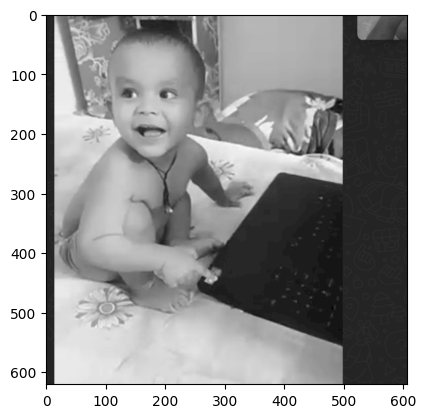

In [28]:
plt.imshow(img, cmap="gray")

# Reading color images


In [29]:
color_img = cv.imread("coder.png", 1) # 1 for rgb reading

In [30]:
color_img  # each pixel is in bbr format 

array([[[ 36,  36,  36],
        [ 38,  38,  38],
        [ 42,  42,  42],
        ...,
        [ 84,  85,  98],
        [ 86,  80, 100],
        [ 86,  77,  99]],

       [[ 37,  37,  37],
        [ 41,  41,  41],
        [ 43,  43,  43],
        ...,
        [ 83,  83,  98],
        [ 84,  79,  99],
        [ 83,  76,  97]],

       [[ 39,  39,  39],
        [ 43,  43,  43],
        [ 39,  39,  39],
        ...,
        [ 83,  80,  95],
        [ 82,  78,  97],
        [ 79,  77,  96]],

       ...,

       [[ 43,  43,  43],
        [ 40,  40,  40],
        [ 36,  36,  36],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]],

       [[ 43,  43,  43],
        [ 39,  39,  39],
        [ 36,  36,  36],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]],

       [[ 43,  43,  43],
        [ 39,  39,  39],
        [ 36,  36,  36],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]]

In [31]:
color_img.shape # first two are size of the image (pixels)

(621, 607, 3)

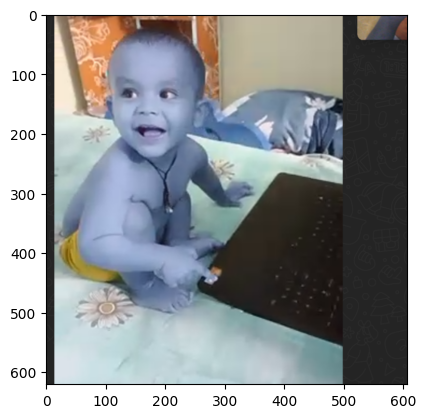

In [32]:
# Using matplot to show
plt.imshow(color_img) # djinnnnnnn (what happened??)

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

In [33]:
# Swap the first and last position
color_img_temp = color_img
for i in range(color_img_temp.shape[0]):
    for j in range(color_img_temp[i].shape[0]): 
        color_img_temp[i][j][0], color_img_temp[i][j][2] = color_img_temp[i][j][2], color_img_temp[i][j][0] # swapping BGR to RGB

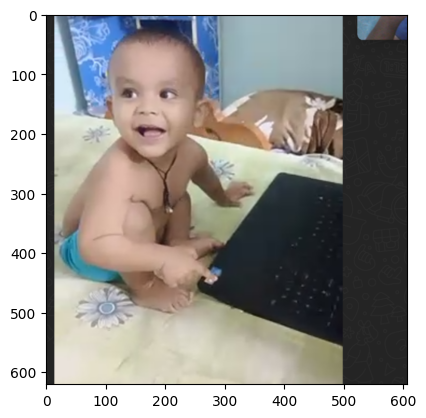

In [34]:
plt.imshow(color_img_temp) # show colored image

## Splitting and Merging Color Channels


* **`cv2.split()`** Divides a multi-channel array into several single-channel arrays.

* **`cv2.merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

<a href="https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a" target="_blank">Documentation link</a>

In [35]:
img_nature_bgr = cv.imread("nature.jpg", cv.IMREAD_COLOR)

r, g, b = cv.split(img_nature_bgr) # split the image

Text(0.5, 1.0, 'Merged Channel')

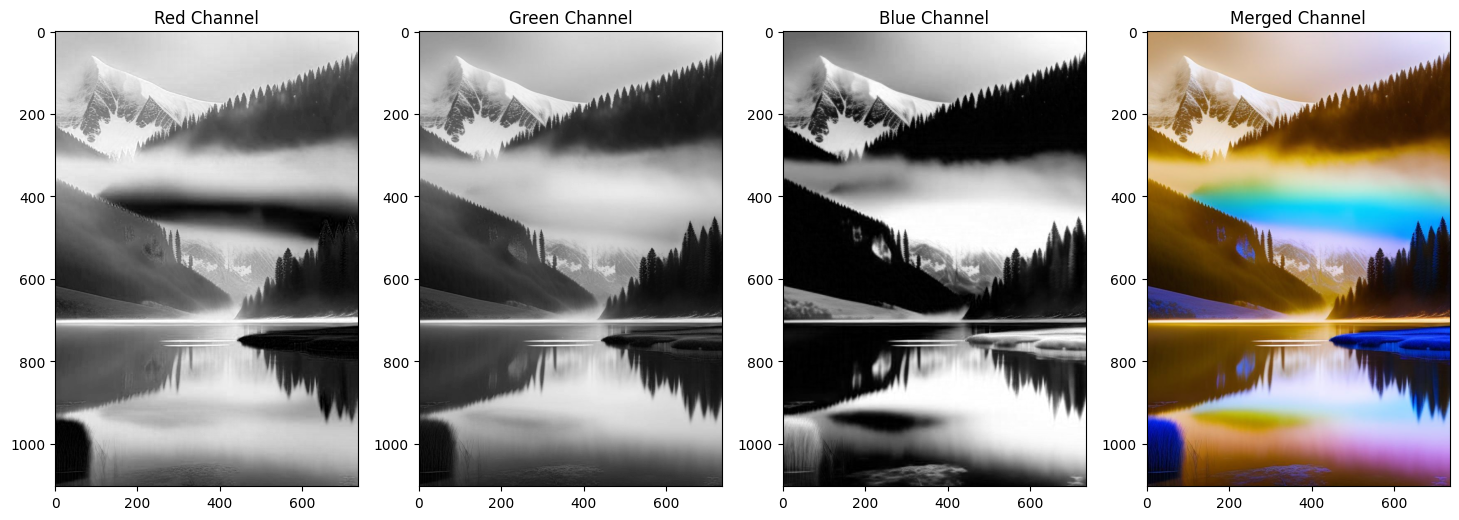

In [36]:
# show using matplotlib
plt.figure(figsize=[18, 20])

# Show the channels
plt.subplot(141)
plt.imshow(r, cmap = "gray")
plt.title("Red Channel")

plt.subplot(142)
plt.imshow(g, cmap = "gray")
plt.title("Green Channel")
plt.subplot(143)
plt.imshow(b, cmap = "gray")
plt.title("Blue Channel")

# Merge the three of them
merged_image = cv.merge((b, g, r))
plt.subplot(144)
plt.imshow(merged_image[:, :, ::-1])
plt.title("Merged Channel")


## Converting to different Color Spaces


**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

2. `code` color space conversion code (see ColorConversionCodes).

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. **`cv2.cvtColor`**: <a href="https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab" target="_blank">Documentation link</a>  

2. **`ColorConversionCodes`**: <a href="https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0" target="_blank">Documentation link</a>


### Converting from BGR to RGB

In [37]:

img_nature_rgb = cv.cvtColor(img_nature_bgr, cv.COLOR_BGR2RGB)

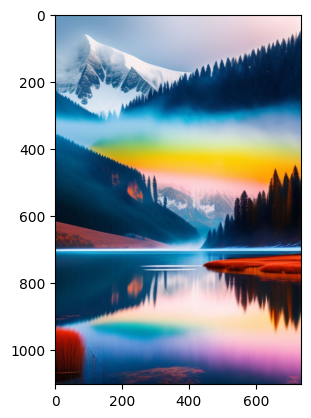

In [38]:
# Show using plt
plt.imshow(img_nature_rgb)

### Converting to HSV Space

In [39]:
img_hsv = cv.cvtColor(img_nature_bgr, cv.COLOR_BGR2HSV)

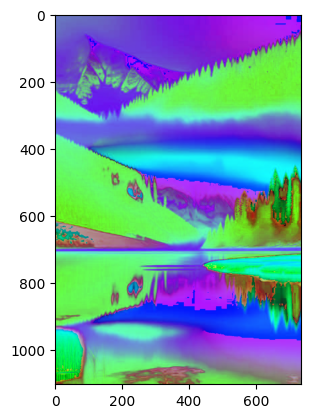

In [40]:
plt.imshow(img_hsv)

Text(0.5, 1.0, 'Original Channel')

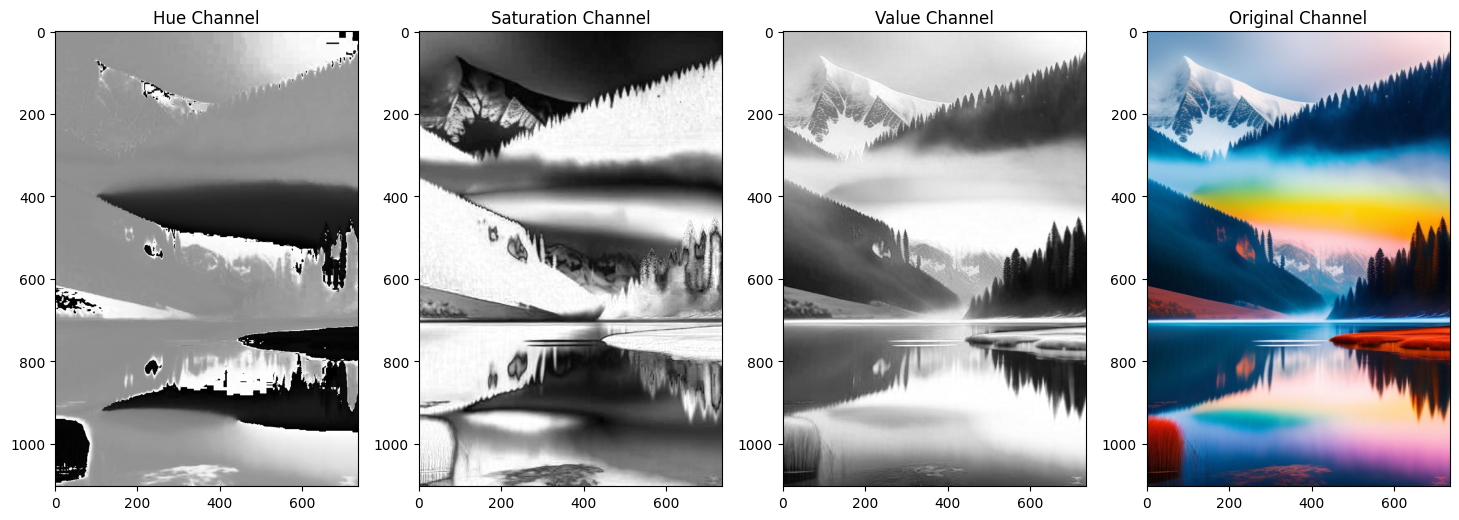

In [41]:
h, s, v = cv.split(img_hsv)

plt.figure(figsize=[18, 20])
# Show the different channels
plt.subplot(141)
plt.imshow(h, cmap = "gray")
plt.title("Hue Channel")

plt.subplot(142)
plt.imshow(s, cmap = "gray")
plt.title("Saturation Channel")
plt.subplot(143)

plt.imshow(v, cmap = "gray")
plt.title("Value Channel")

plt.subplot(144)
plt.imshow(img_nature_rgb)
plt.title("Original Channel")

# Modifying one of the channel

Text(0.5, 1.0, 'Original Channel')

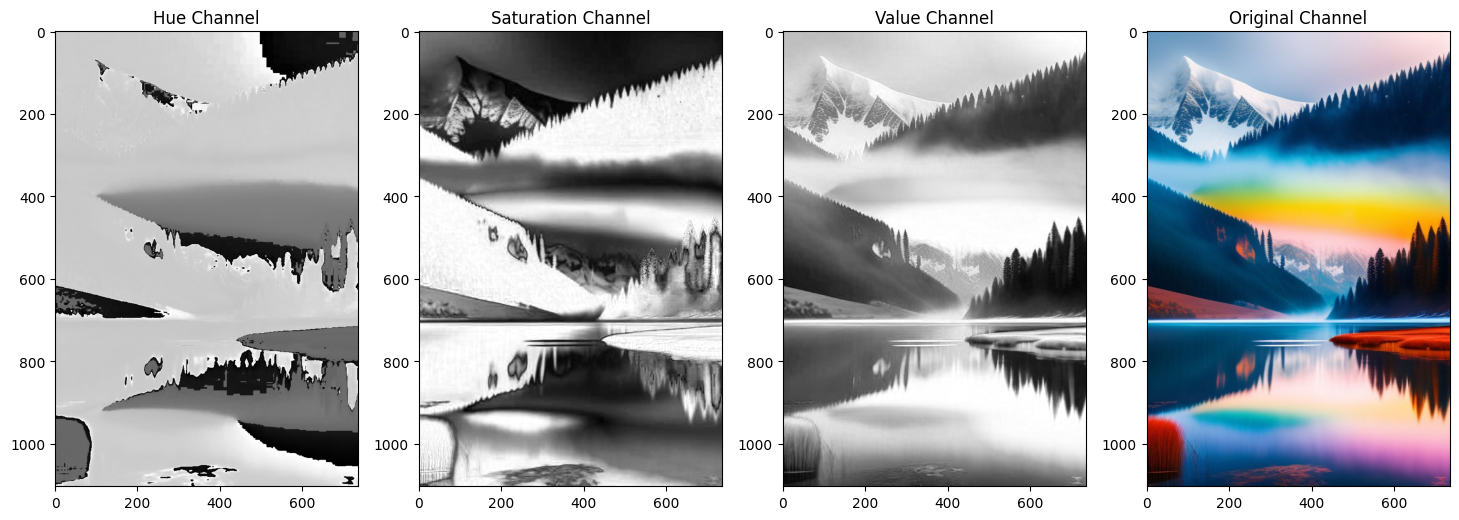

In [42]:
h = h + 100
img_new_hsv = cv.merge((h, s, v))
img_new_rgb = cv.cvtColor(img_new_hsv, cv.COLOR_HSV2RGB)

plt.figure(figsize=[18, 20])
# Show the different channels
plt.subplot(141)
plt.imshow(h, cmap = "gray")
plt.title("Hue Channel")

plt.subplot(142)
plt.imshow(s, cmap = "gray")
plt.title("Saturation Channel")
plt.subplot(143)

plt.imshow(v, cmap = "gray")
plt.title("Value Channel")

plt.subplot(144)
plt.imshow(img_nature_rgb)
plt.title("Original Channel")   

## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).


### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path.

2. `img`: Image or Images to be saved.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. **`Imwrite`**: <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce" target="_blank">Documentation link</a>

2. **`ImwriteFlags`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac" target="_blank">Documentation link</a>

In [43]:
cv.imwrite("djinn_hammad.png", color_img)

True

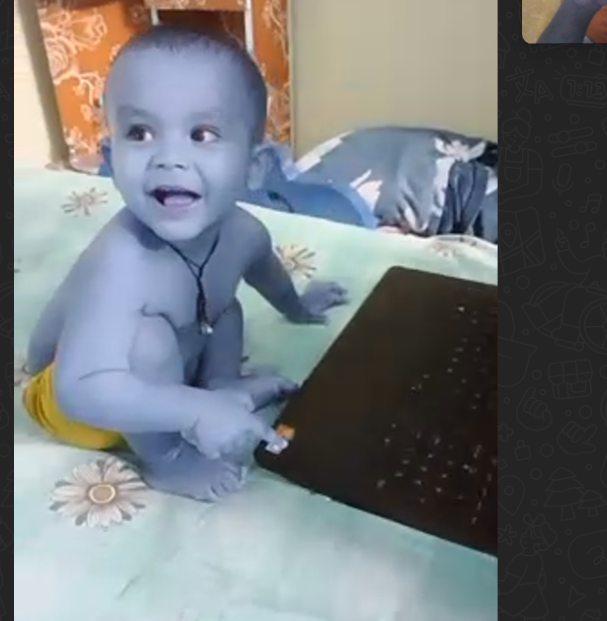

In [44]:
Image(filename="djinn_hammad.png")

In [48]:
# read the image as Color
img_nature_colored = cv.imread("nature.jpg", cv.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_nature_colored.shape)

# read the image as Grayscaled
img_nature_gray = cv.imread("nature.jpg", cv.IMREAD_GRAYSCALE)
print("img_natrure_gray shape (H, W) is:", img_nature_gray.shape)

img_NZ_bgr shape (H, W, C) is: (1104, 736, 3)
img_natrure_gray shape (H, W) is: (1104, 736)


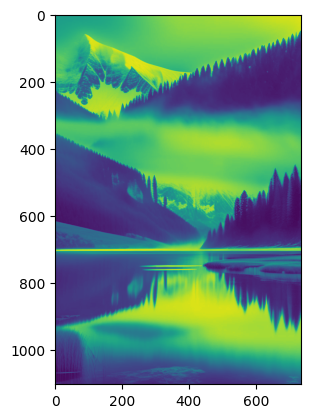

In [50]:
plt.imshow(img_nature_gray)